## MNIST digit recognition using a deep neural net with Keras

Let's create a deep neural network using Keras and try to classify digits

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
nb_classes = 10

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


Let's look at some examples of the training data

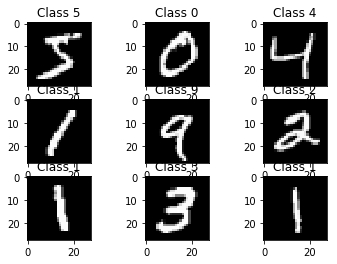

In [3]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))
plt.show()

Format the data for training

In [4]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


Modify the target matrices to be in the one-hot format<br/>

0 -> [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]<br>
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]<br>
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]<br>
...

In [5]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

Let's create the network<br>
    <img src="images/mnist_network.png" alt="MNIST network" title="MNIST network" />

In [6]:
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2)) # Dropout helps protect the model against overfitting
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [8]:
early_stopping_monitor = EarlyStopping(patience=2)

model.fit(X_train, Y_train, batch_size=128, epochs=30, verbose=1, validation_data=(X_test, Y_test), callbacks=[early_stopping_monitor])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 6s 93us/step - loss: 0.2488 - acc: 0.9257 - val_loss: 0.1067 - val_acc: 0.9668
Epoch 2/30
60000/60000 [==============================] - 5s 87us/step - loss: 0.1010 - acc: 0.9694 - val_loss: 0.0814 - val_acc: 0.9752
Epoch 3/30
60000/60000 [==============================] - 5s 89us/step - loss: 0.0712 - acc: 0.9778 - val_loss: 0.0692 - val_acc: 0.9789
Epoch 4/30
60000/60000 [==============================] - 5s 90us/step - loss: 0.0550 - acc: 0.9827 - val_loss: 0.0694 - val_acc: 0.9792
Epoch 5/30
60000/60000 [==============================] - 5s 87us/step - loss: 0.0465 - acc: 0.9846 - val_loss: 0.0679 - val_acc: 0.9789
Epoch 6/30
60000/60000 [==============================] - 6s 92us/step - loss: 0.0407 - acc: 0.9866 - val_loss: 0.0708 - val_acc: 0.9803
Epoch 7/30
60000/60000 [==============================] - 5s 88us/step - loss: 0.0365 - acc: 0.9880 - val_loss: 0.0599 - val_acc

Evaluate the performance

In [9]:
score = model.evaluate(X_test, Y_test, verbose=0)

print('Test score:', score[0])
print('Test accuracy', score[1])

Test score: 0.07369526913755399
Test accuracy 0.9811


Inspect the output

In [10]:
predicted_classes = model.predict(X_test)
predicted_classes[0]

array([1.1609123e-09, 4.5111932e-08, 3.8193739e-06, 3.9364895e-08,
       4.3662168e-11, 1.6196122e-10, 3.4862023e-14, 9.9998355e-01,
       2.2708900e-08, 1.2671095e-05], dtype=float32)

In [11]:
predictions = np.argmax(predicted_classes, axis=1)

In [12]:
predictions.shape

(10000,)

In [13]:
predictions[501]

9

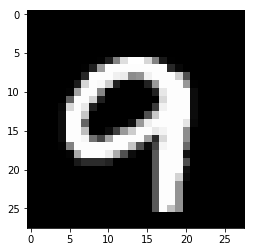

In [14]:
plt.imshow(X_test[501].reshape(28, 28), cmap='gray', interpolation='none')
plt.show()

In [15]:
y_test[501]

9

In [16]:
correct_indices = (predictions == y_test)
incorrect_indices = (predictions != y_test)

In [17]:
correct_indices

array([ True,  True,  True, ...,  True,  True,  True])

In [18]:
incorrect_indices[100:200]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [19]:
predictions

array([7, 2, 1, ..., 4, 5, 6])

In [20]:
print("Accuracy on the test samples", np.count_nonzero(correct_indices)/len(correct_indices))

Accuracy on the test samples 0.9811


In [21]:
predictions[correct_indices]

array([7, 2, 1, ..., 4, 5, 6])

In [22]:
y_test[correct_indices]

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [23]:
predictions[incorrect_indices]

array([8, 5, 2, 0, 7, 3, 4, 0, 5, 2, 8, 2, 7, 8, 8, 7, 5, 8, 9, 4, 2, 0,
       5, 2, 8, 6, 8, 8, 2, 4, 9, 5, 1, 3, 2, 9, 3, 8, 5, 9, 7, 2, 3, 5,
       7, 0, 2, 8, 4, 5, 3, 4, 2, 0, 5, 9, 2, 3, 7, 4, 1, 3, 0, 1, 4, 4,
       4, 5, 4, 5, 7, 3, 1, 4, 5, 5, 0, 2, 5, 5, 5, 5, 8, 2, 9, 0, 5, 0,
       7, 1, 4, 5, 0, 5, 3, 4, 2, 8, 2, 8, 4, 1, 2, 4, 3, 2, 5, 4, 4, 5,
       3, 7, 7, 4, 7, 8, 5, 4, 7, 5, 4, 8, 2, 2, 2, 5, 2, 5, 4, 5, 8, 5,
       4, 4, 2, 2, 8, 5, 2, 7, 0, 2, 8, 8, 5, 9, 0, 5, 9, 2, 2, 7, 4, 8,
       9, 2, 3, 8, 8, 8, 8, 4, 9, 4, 2, 5, 5, 3, 9, 2, 2, 5, 2, 5, 4, 1,
       7, 3, 6, 2, 0, 0, 5, 4, 3, 8, 2, 0, 8])

In [24]:
y_test[incorrect_indices]

array([9, 6, 4, 6, 2, 5, 9, 6, 3, 8, 3, 8, 2, 1, 5, 9, 3, 3, 8, 5, 1, 6,
       6, 7, 6, 4, 7, 6, 7, 9, 4, 9, 7, 8, 8, 7, 5, 1, 6, 7, 8, 4, 9, 6,
       3, 8, 4, 2, 6, 6, 8, 9, 7, 6, 6, 0, 7, 5, 3, 6, 6, 5, 9, 9, 9, 6,
       9, 6, 2, 3, 9, 5, 6, 9, 6, 6, 8, 3, 9, 3, 6, 8, 6, 1, 5, 6, 6, 6,
       3, 9, 6, 6, 5, 8, 9, 6, 7, 5, 4, 7, 0, 7, 6, 9, 1, 4, 3, 9, 9, 6,
       0, 9, 2, 6, 1, 2, 9, 9, 8, 6, 7, 6, 6, 7, 6, 3, 6, 3, 9, 6, 0, 6,
       9, 8, 3, 1, 1, 1, 3, 9, 6, 4, 3, 3, 3, 3, 3, 9, 8, 0, 6, 0, 8, 0,
       8, 0, 0, 1, 1, 1, 1, 6, 3, 6, 0, 3, 8, 5, 4, 7, 7, 0, 7, 8, 9, 0,
       2, 6, 5, 4, 2, 5, 6, 9, 2, 6, 0, 6, 3], dtype=uint8)

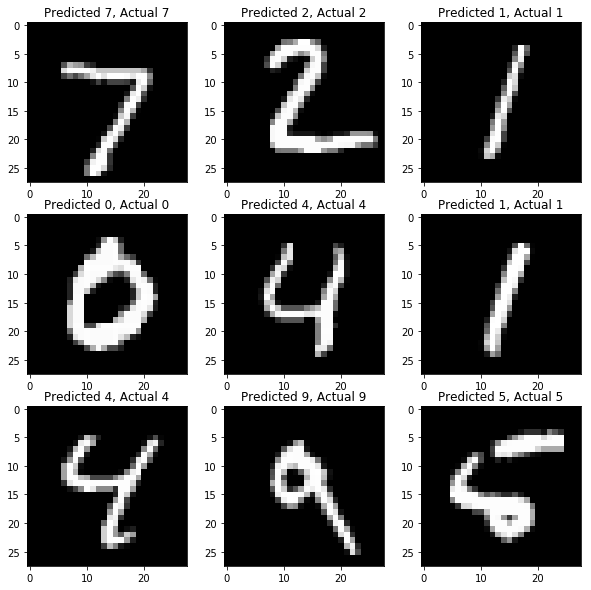

In [25]:
plt.rcParams['figure.figsize'] = (10,10) # Make the figures a bit bigger

for i, enum in enumerate(zip(predictions[correct_indices][:9], y_test[correct_indices][:9], X_test[correct_indices][:9])):
    plt.subplot(3, 3, i+1)
    plt.imshow(enum[2].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Actual {}".format(enum[0],enum[1]))
plt.show()

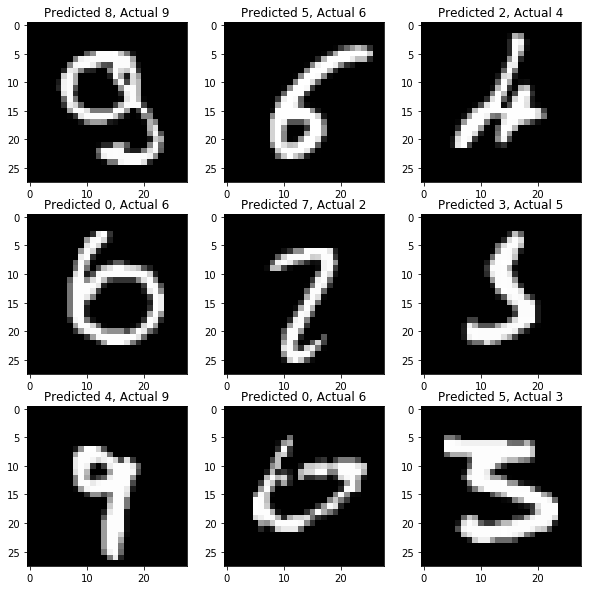

In [26]:
plt.rcParams['figure.figsize'] = (10,10) # Make the figures a bit bigger

for i, enum in enumerate(zip(predictions[incorrect_indices][:9], y_test[incorrect_indices][:9], X_test[incorrect_indices][:9])):
    plt.subplot(3, 3, i+1)
    plt.imshow(enum[2].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Actual {}".format(enum[0],enum[1]))
plt.show()